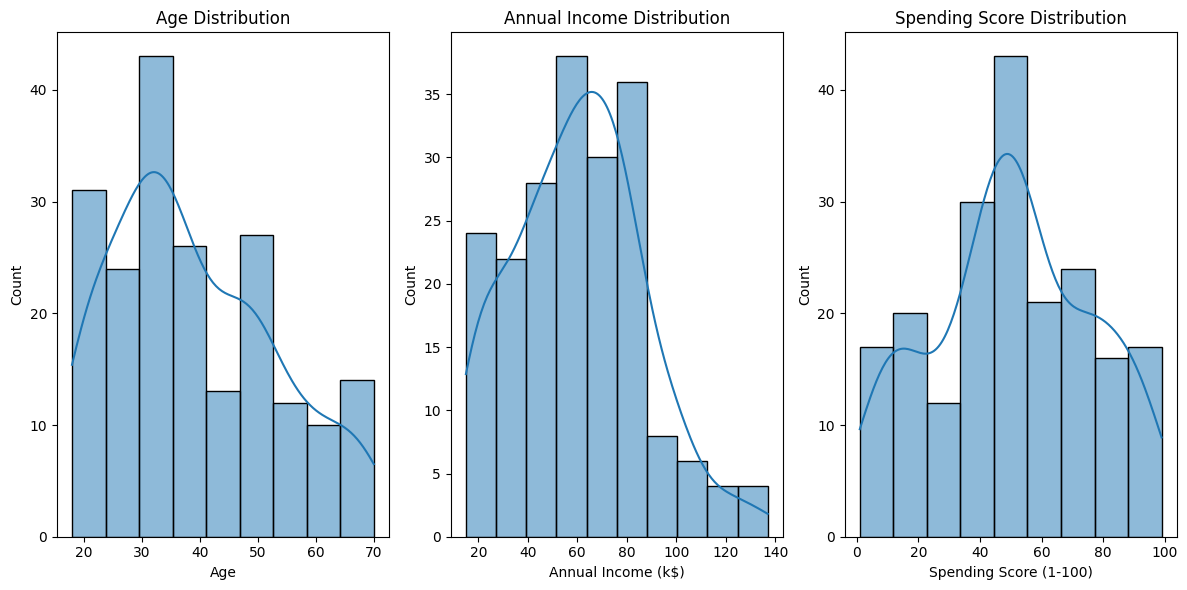

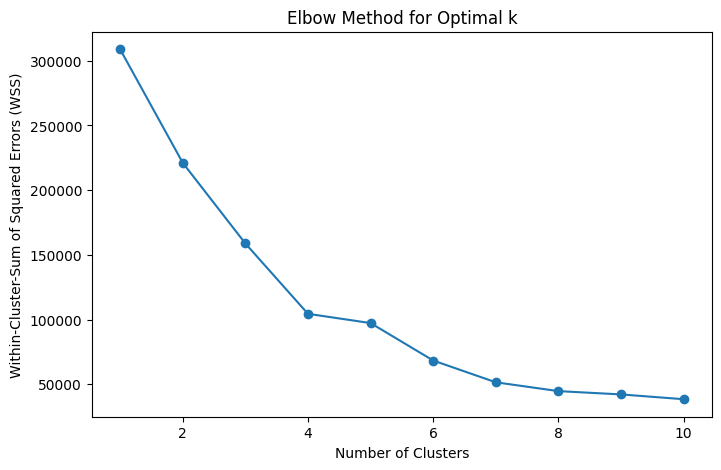

Silhouette Scores for each k: {4: 0.4052954330641215, 5: 0.3574050351346702, 6: 0.41532495778518114}


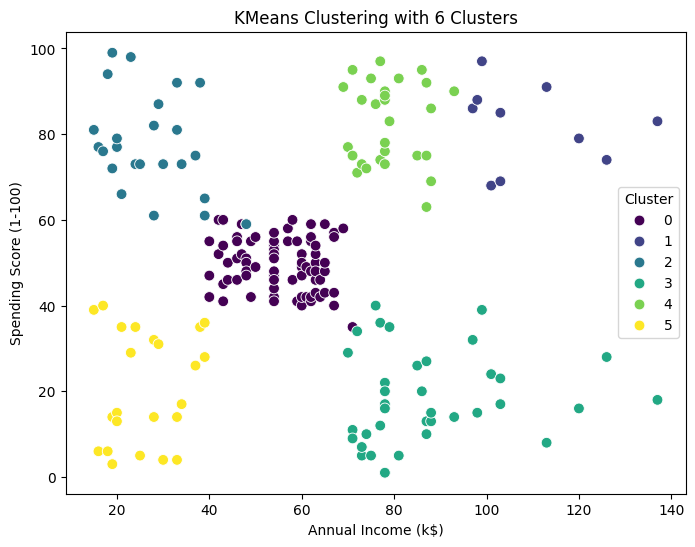

In [153]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Encode 'Genre' column and drop 'CustomerID' column
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data = data.drop(columns=['CustomerID'])

# Plot distributions of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Determine the optimal number of clusters using the Elbow method
wss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

# Plot WSS to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.show()

# Test KMeans with 4, 5, and 6 clusters to find the best silhouette score
cluster_options = [4, 5, 6]
results = {}

for k in cluster_options:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    results[k] = silhouette_avg

print("Silhouette Scores for each k:", results)

# Choose the best k based on silhouette scores (e.g., k=5)
best_k = max(results, key=results.get)
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Visualize the clusters (using the first two features as an example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'],
                hue=data['Cluster'], palette="viridis", s=60)
plt.title(f'KMeans Clustering with {best_k} Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
df.shape

(200, 5)

In [127]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [128]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [129]:
df.drop_duplicates()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [130]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [131]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [132]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [134]:
df = df.rename(columns={'Genre': 'Gender'})

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [136]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


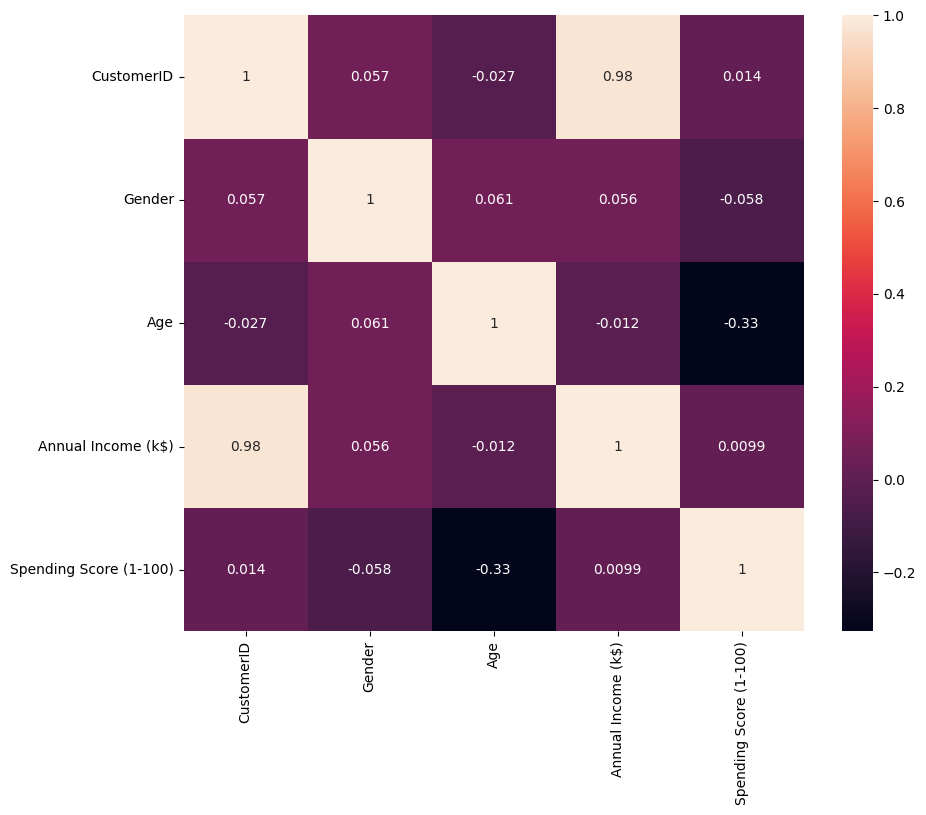

In [137]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [138]:
df = df.drop('CustomerID', axis=1)

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Spending Score (1-100)', axis=1), df['Spending Score (1-100)'], test_size=0.2, random_state=42)

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [141]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [142]:
wcss

[480.00000000000006,
 319.10413376138183,
 248.3540209564121,
 188.2040190364593,
 137.5709707953664,
 99.25763659369127,
 88.05144036042432,
 81.05472001671146,
 78.55511821089581,
 63.484609300957345]

Text(0, 0.5, 'WCSS')

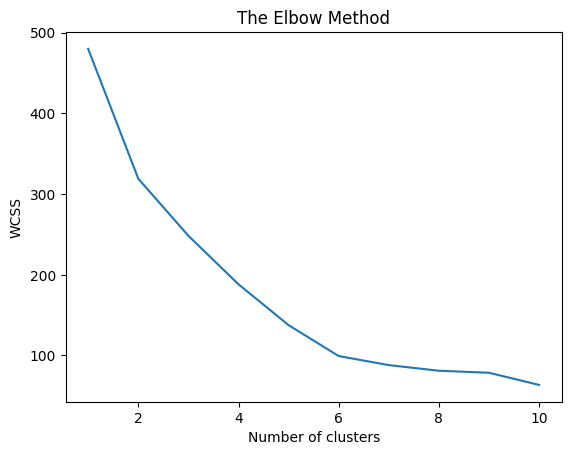

In [143]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [144]:
!pip install kneed

In [145]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

5

In [146]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4,init='k-means++')
k_means.fit(x_train)
y_train_labels = k_means.predict(x_train)

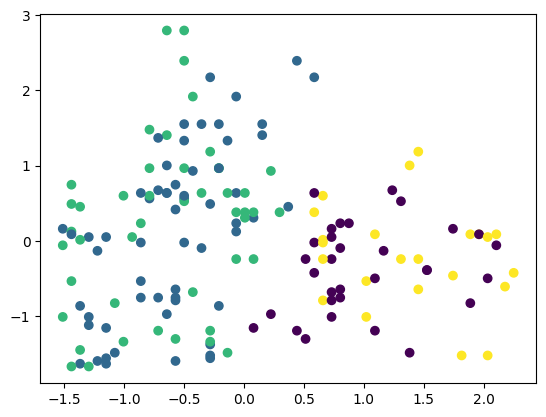

In [147]:
plt.scatter(x_train[:, 1], x_train[:, 2], c=y_train_labels)
# plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300)
plt.show()

In [148]:
k_means.predict(x_test)

array([2, 2, 3, 2, 3, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 3, 2, 1, 1,
       1, 1, 2, 3, 1, 0, 1, 1, 1, 3, 3, 2, 2, 3, 1, 2, 3, 0], dtype=int32)

In [149]:
from sklearn.metrics import silhouette_score
silhouette_coef = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coef.append(score)

In [150]:
silhouette_coef

[0.3622295370322142,
 0.33745152309331683,
 0.35546270099924604,
 0.41055342478049284,
 0.4429420726406866,
 0.4333055965489624,
 0.4137492269709265,
 0.3926775023573145,
 0.41288589894227207]